In [1]:
%matplotlib inline

In [2]:
import os

In [3]:
import numpy as np 

In [4]:
import pandas as pd 

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras import layers

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
import time

In [16]:
dtypes = {
"duration": np.int8,
"protocol_type": np.object,
"service": np.object,
"flag": np.object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": np.object
}

In [17]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

In [18]:
df = pd.read_csv("DDoSDNSDataset.csv", sep=",", names=columns, dtype=dtypes, index_col=None)

In [19]:
df.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [20]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,m_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.000000,494021.0,494021.0,494021.000000,494021.000000
mean,0.182921,5.899960,1.544438,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.005548,...,1.032778,1.657847,NaN,0.030914,NaN,0.006683,NaN,NaN,0.058136,0.057404
std,7.746121,28.748878,33.940572,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,0.252424,...,21.726016,18.781605,0.000000,0.109314,0.0,0.042084,0.0,0.0,0.230713,0.230225
min,-128.000000,-128.000000,-128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,...,-128.000000,-128.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.409912,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000
75%,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,0.040009,1.0,0.000000,0.0,0.0,0.000000,0.000000
max,127.000000,127.000000,127.000000,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,116.000000,...,127.000000,127.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000


In [21]:
data = df.copy()

In [22]:
df.shape

(494021, 42)

In [23]:
df=df[df["service"]=="http"]
df=df.drop("service",axis=1)
columns.remove("service")
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,m_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,-75,74,0,0,0,0,0,...,9,1.0,0.0,0.109985,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,-17,-26,0,0,0,0,0,...,19,1.0,0.0,0.049988,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,-21,57,0,0,0,0,0,...,29,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,-37,57,0,0,0,0,0,...,39,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,-39,-16,0,0,0,0,0,...,49,1.0,0.0,0.020004,0.0,0.0,0.0,0.0,0.0,normal.


In [24]:
df.shape

(64293, 41)

In [25]:
for col in df.columns:
    if(df[col].dtypes=="object"):
        encoded=LabelEncoder()
        encoded.fit(df[col])
        df[col]=encoded.transform(df[col])

In [26]:
for f in range(0,3):
    df=df.iloc[np.random.permutation(len(df))]

In [27]:
df2=df[:40000]
labels=df2["label"]
df_validate=df[40000:]
x_train,x_test,y_train,y_test=train_test_split(df2,labels,test_size=0.2,random_state=42)
x_val,y_val=df_validate,df_validate["label"]

In [28]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(32000, 41)
(8000, 41)
(24293, 41)


In [29]:
model=IsolationForest(n_estimators=500,max_samples=256,contamination=0.1,random_state=42)

In [30]:
model.fit(x_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=256, n_estimators=500,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [31]:
anomaly_scores=model.decision_function(x_val)

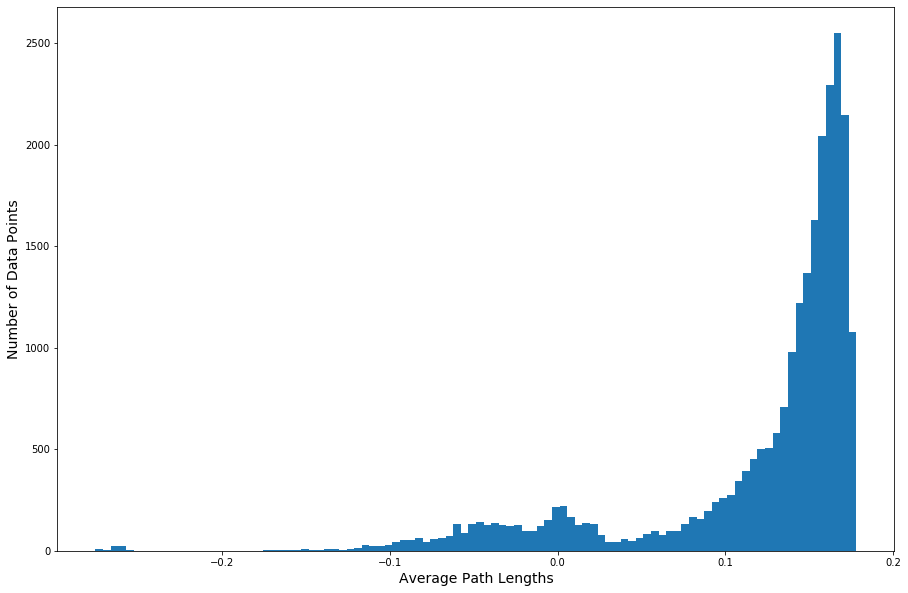

In [32]:
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores,bins=100)
plt.xlabel('Average Path Lengths',fontsize=14)
plt.ylabel('Number of Data Points',fontsize=14)
plt.show()

In [33]:
anomalies=anomaly_scores>-0.19
matches=y_val==list(encoded.classes_).index("normal.")
auc=roc_auc_score(anomalies,matches)
print("AUC: {:.2%}".format(auc))

AUC: 98.22%


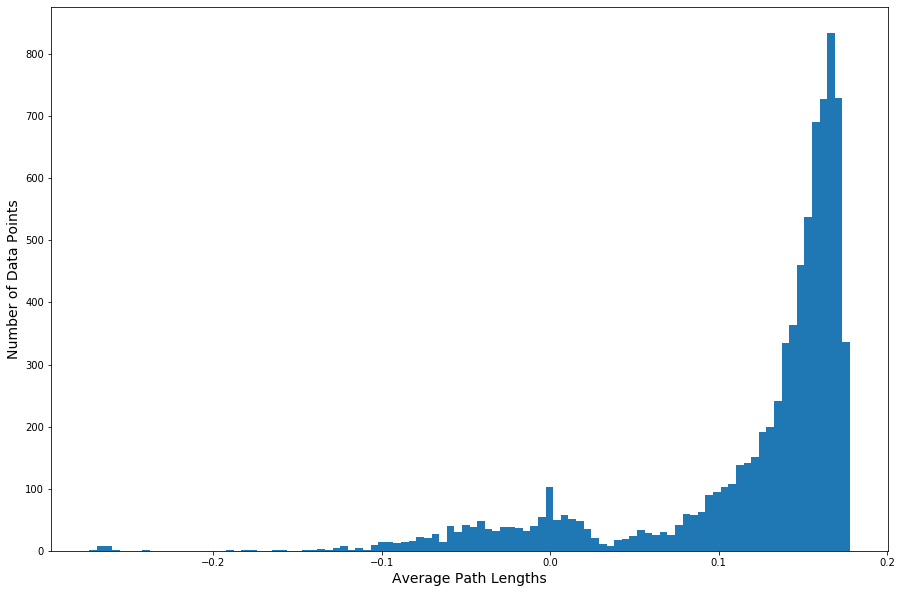

In [34]:
anomaly_scores_test=model.decision_function(x_test)
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores_test,bins=100)
plt.xlabel('Average Path Lengths',fontsize=14)
plt.ylabel('Number of Data Points',fontsize=14)
plt.show()

In [35]:
anomalies=anomaly_scores_test>-0.19
matches=y_test==list(encoded.classes_).index("normal.")
auc=roc_auc_score(anomalies,matches)
print("AUC: {:.2%}".format(auc))

AUC: 98.30%


In [36]:
df = data.copy()

In [37]:
new_features=['dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate','label']

In [38]:
df.label=df.label.apply(lambda x: 0 if x == 'normal.' else 1)

In [39]:
df=df[new_features]

In [40]:
for column in df.columns:
    if df[column].dtype == np.object:
        encoded = LabelEncoder()
        
        encoded.fit(df[column])
        df[column] = encoded.transform(df[column])

In [41]:
df_train=df[df.label==0].sample(500)

In [42]:
index_list=df_train.index
df=df.drop(index_list)

In [43]:
df_train=df_train.drop('label',axis=1)

In [44]:
df_train.shape

(500, 8)

In [45]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8))
    assert model.output_shape == (None,8 )
   
    
    return model

In [46]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[1,8]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    return model

In [47]:
generator=make_generator_model()

In [48]:
discriminator=make_discriminator_model()

In [49]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [50]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [51]:
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss)  

Loss:  tf.Tensor(0.0, shape=(), dtype=float32)


In [52]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [53]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [54]:
EPOCHS = 10
noise_dim = 100
BATCH_SIZE = 64

In [55]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,8))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [56]:
history=dict()
history['gen']=[]
history['dis']=[]

In [57]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [58]:
x_train=df_train.values
train(x_train,EPOCHS) 

Time for epoch 1 is 9.374958276748657 sec 
Time for epoch 2 is 0.7320427894592285 sec 
Time for epoch 3 is 0.7639510631561279 sec 
Time for epoch 4 is 0.7480003833770752 sec 
Time for epoch 5 is 0.7176012992858887 sec 
Time for epoch 6 is 0.6851687431335449 sec 
Time for epoch 7 is 0.8008596897125244 sec 
Time for epoch 8 is 0.8218042850494385 sec 
Time for epoch 9 is 0.757972240447998 sec 
Time for epoch 10 is 0.7140908241271973 sec 


In [59]:
history.keys()

dict_keys(['gen', 'dis'])

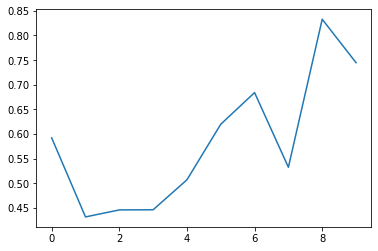

In [60]:
plt.plot(history['gen'])

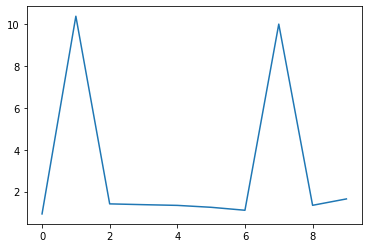

In [61]:
plt.plot(history['dis'])

In [62]:
y_test=df.label
x_test=df.drop('label',axis=1).values.reshape(-1,1,8)

In [63]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: label, Length: 493521, dtype: int64

In [64]:
y_pred=discriminator.predict(x_test)

Text(0, 0.5, 'y_pred')

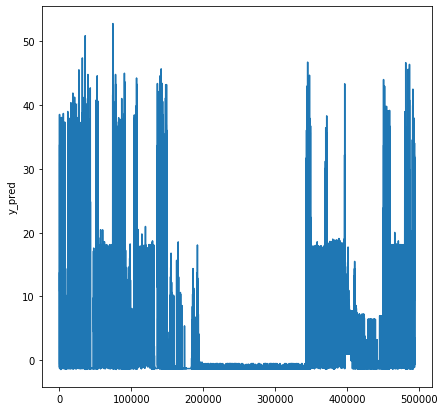

In [65]:
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [66]:
prob=[-0.2,-0.1,-0.05,0,0.005,0.1]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.7959609476628786 : accuracy=0.7231789528713064 : precision=0.9199862374780847 : recall=0.6716514217012021
220701 272820
prob =-0.1 and f1 score =0.7965056618182251 : accuracy=0.7235497577610679 : precision=0.9193988111929792 : recall=0.6730074632696733
219808 273713
prob =-0.05 and f1 score =0.7968115376073713 : accuracy=0.7237746722023987 : precision=0.9191183274751952 : recall=0.6737308534744154
219345 274176
prob =0 and f1 score =0.7970189806856404 : accuracy=0.7238942213198628 : precision=0.9188279263670455 : recall=0.6743030122774692
218950 274571
prob =0.005 and f1 score =0.7970275350704985 : accuracy=0.7238861162949499 : precision=0.9187765560220118 : recall=0.6743584637914216
218902 274619
prob =0.1 and f1 score =0.797668738304272 : accuracy=0.7243926803520012 : precision=0.918290687473856 : recall=0.6757976826308215
218010 275511
